# Защита данных клиента страховой компании

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## 1. Загрузка данных

In [34]:
# импорт библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# метрика
from sklearn.metrics import r2_score

# модель
from sklearn.linear_model import LinearRegression

In [35]:
# чтение файла и печать общей информации
df_ins = pd.read_csv('/datasets/insurance.csv')

df_ins.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [36]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [37]:
df_ins['Страховые выплаты'].value_counts(normalize=True)

0    0.8872
1    0.0846
2    0.0230
3    0.0036
4    0.0014
5    0.0002
Name: Страховые выплаты, dtype: float64

## 2. Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$


**Ответ:**  Не изменится

**Обоснование:**

$$
w = (X^T X)^{-1} X^T y
$$
Преобразование матрицы Х
$$
w' = ((XP)^T (XP))^{-1} (XP)^T y =
$$

$$
= (P^T X^T X P)^{-1}  (XP)^T y =
$$
$$
= (P^T (X^TX) P)^{-1} (XP)^T y = 
$$
$$
= (P^T ((X^TX) P))^{-1} P^T X^T y =
$$
$$
= ((X^TX)P)^{-1} (((P^T))^{-1}P^T) X^T y = ((X^TX)P)^{-1} E X^T y =
$$
$$
= P^{-1}(X^TX)^{-1} X^Ty
$$
<font color='blue'>Значит, $w' = P^{-1} w$. </font>


Предсказание
$$
a = Xw = 
$$
$$
= X (X^T X)^{-1} X^T y
$$
Предсказане на преобразованных данных
$$
a' = XP P^{-1}(X^TX)^{-1} X^Ty = XE(X^TX)^{-1} X^Ty
$$
$$
= X (X^T X)^{-1} X^T y
$$


Если упростить формулу, то в преобразованном варианте появляетс $P^{-1}$ На данном этапе это единственной различие в формуле весов.

Далее если перейти к предсказаниям, то $а$ и $a'$ в итоге после упрощения равны.

## 3. Алгоритм преобразования

**Алгоритм** 

Нужно создать матрицу со случайными значениями по нормальному распределению, но такую, у которой можно найти обратную матрицу. Далее, эту матрицу умножить на матрицу признаков, и потом на этих данных обучить модель

**Обоснование**

В п.2 уже провели обоснование равенства результатов исходной и преобрвазованной Данное обоснование справдливо и для нашей цели.

## 4. Проверка алгоритма

In [38]:
# генерация матрицы со случайными значениями по нормальному распределению 
#p = np.random.normal(size=(4 ,  4))
state = np.random.RandomState(12345)
p = state.normal(size=(4 ,  4))
# проверна на возможность вычисления обратной матрицы
np.linalg.inv(p)

array([[-1.31136747,  0.3921804 ,  0.18868055, -0.67088287],
       [ 1.75872714,  0.14106138, -0.17773045,  0.79787127],
       [-0.41702659, -0.22854768,  0.3550602 ,  0.33039819],
       [ 0.58912996,  0.19073027, -0.5545481 ,  0.6259302 ]])

In [39]:
df_train, df_test = train_test_split(df_ins, test_size=0.2, random_state=12345)

# разделение на обучающие признаки и целевой
features_train = df_train.drop(['Страховые выплаты'], axis=1)
target_train = df_train['Страховые выплаты']

features_test = df_test.drop(['Страховые выплаты'], axis=1)
target_test = df_test['Страховые выплаты']

# словарь для результатов тестирования
test_score = {}

In [40]:
# обучение и проверка модели
model = (LinearRegression()
         .fit(features_train, target_train))
predictions = model.predict(features_train)
r2 = (r2_score(target_train, predictions))
test_score['Исходные данные обучающая выборка'] = r2

# проверка модели на тестовых данных
predictions_test_LR = model.predict(features_test)
r2_test = r2_score(target_test, predictions_test_LR)
test_score['Исходные данные тестовая выборка'] = r2_test

In [44]:
# обучение и проверка модели на преобразованных данных
features_train_p = features_train.dot(p)
features_test_p = features_test.dot(p)

model = (LinearRegression()
         .fit(features_train_p, target_train))
predictions = model.predict(features_train_p)
r2_train_p = (r2_score(target_train, predictions))
test_score['Преобразованные данные обучающая выборка'] = r2_train_p

# проверка модели на тестовых данных
predictions_test_LR = model.predict(features_test_p)
r2_test_p = (r2_score(target_test, predictions_test_LR))
test_score['Преобразованные данные тестовой выборка'] = r2_test_p

In [45]:
columns = ['R2']
data_test = pd.DataFrame.from_dict(data=test_score, columns=columns, orient='index')
data_test

,R2
Исходные данные обучающая выборка,0.427341
Исходные данные тестовая выборка,0.411768
Преобразованные данные обучающая выборка,0.427341
Преобразованные данные тестовой выборка,0.411768


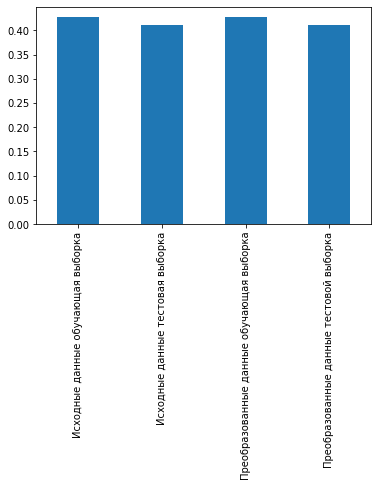

In [46]:
data_test.plot(kind='bar', legend=False)

### Вывод

Результат метрики на исходных данных и на преоразованных не изменились. Соответвено защита данных клиентов ни как не повлияла на результаты работы модели.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования